# Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.





In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("data.csv")



## Data Preparation

In [2]:

#Eliminate " Unnamed: 32" & "id"
df= df.drop("Unnamed: 32",axis=1)
df= df.drop("id", axis=1)
df= df.replace({"M":1, "B":0})

#Drop not important features
drop_col = ["fractal_dimension_se", "smoothness_se", "fractal_dimension_mean", "texture_se", "symmetry_se"]

df=df.drop(drop_col, axis=1)

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Model:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
#Creating my predictive variable (X) and my target variable (Y)

#y = Target Variable
y = df.iloc[:,0]

#X= Predictors
X= df.iloc[:,1:26]
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



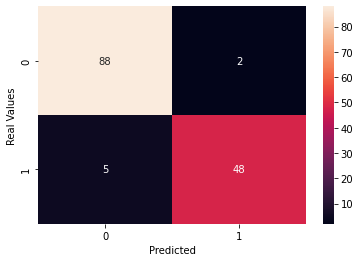

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Feature Importance

                    Feature  Importance
7       concave points_mean    0.218347
17          perimeter_worst    0.173622
18               area_worst    0.154637
22     concave points_worst    0.088600
6            concavity_mean    0.083798
21          concavity_worst    0.051963
9                 radius_se    0.040246
15             radius_worst    0.030372
23           symmetry_worst    0.026475
0               radius_mean    0.022055
1              texture_mean    0.020580
20        compactness_worst    0.014387
10             perimeter_se    0.012773
11                  area_se    0.010300
16            texture_worst    0.008731
8             symmetry_mean    0.006640
24  fractal_dimension_worst    0.005834
2            perimeter_mean    0.005708
4           smoothness_mean    0.005605
13             concavity_se    0.005171
14        concave points_se    0.004858
3                 area_mean    0.003522
5          compactness_mean    0.002185
12           compactness_se    0.001922


c:\Users\Julian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


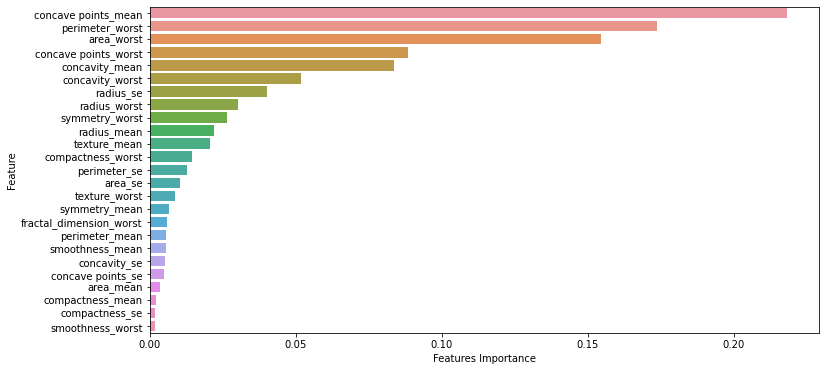

<Figure size 432x288 with 0 Axes>

In [9]:

# Replace these example values with your actual feature names
df1 = df.drop("diagnosis", axis=1)
feature_names = df1.columns.tolist()

# Create a Pandas DataFrame to store feature importances and their corresponding names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})

# Sort the DataFrame by importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importances_df)

plt.figure(figsize=(12, 6))

sn.barplot(feature_importances_df['Importance'], feature_importances_df['Feature'])
plt.xlabel('Features Importance')
plt.show()
plt.tight_layout()  # To avoid overlapping labels
plt.show()


## Hyperparameter Tuning

Hyperparameter tuning in random forest is essential for the overall performance of the machine learning model. It is usually set before the learning process and occurs outside the model. So what happens when hyperparameter tuning random forest does not occur? Well, in such cases the model starts to produce errors and inaccurate results because the loss function does not get minimized. The ultimate goal of hyperparameter tuning random forest is to find a set of optimal hyperparameter values that will result in maximization of the model’s performance, minimizing the loss and producing better output. 

The standard procedure for hyperparameter optimization accounts for overfitting through cross validation.

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74



### Randomised Search CV

We can use scikit learn and RandomisedSearchCV where we can define the grid, the random forest model will be fitted over and over by randomly selecting parameters from the grid. 

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [12]:
# The best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

#### Comparison with test data

In this section it will be analyzed the performance of the base model and the tuned model using the test data.

In [16]:
#Function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

#Base Model
print("Base Model")
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

print()

#Tuned Model
print("Tuned Model")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

#Improvement
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Base Model
Model Performance
Average Error: 0.0023 degrees.
Accuracy = 99.37%.

Tuned Model
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of 0.63%.


We achieved an improvement in accuracy of 0.6%.

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



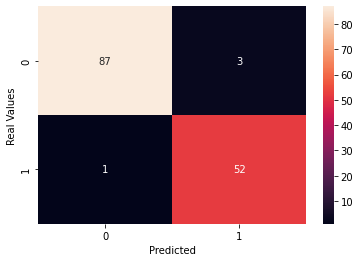

### Comparison with test data

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



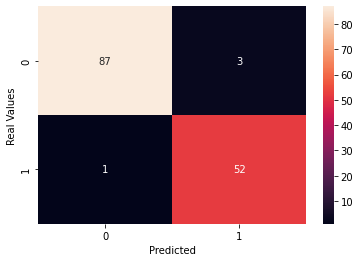

In [29]:
#Tuned model
tuned_model = RandomForestClassifier(n_estimators= 1000, 
                                min_samples_split= 5,
                                min_samples_leaf= 2,
                                max_features= 'sqrt',
                                max_depth= 100,
                                bootstrap= False,
                                random_state=99)
tuned_model.fit(X_train, y_train)

y_pred1=tuned_model.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred1, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



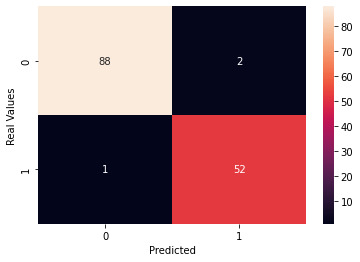

In [27]:
#Basic model
basic_model = RandomForestClassifier()
basic_model.fit(X_train, y_train)

y_pred2=basic_model.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

The employment of hyperparameter tuning does not seem to augment the accuracy of the model when assessed with the testing data. Noteworthy is the observation that the basic_model attains an accuracy surpassing the tuned_model by 0.01.

Grid Search CV